In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
origin = pd.read_csv("./dataset/results-2021-12-18.csv")
titleList = list(origin)
# 随机选择10行数据进行观察
origin.sample(10)
alg = origin.iloc[:,[0]]

# 1- Perform an exploratory analysis of the dataset. Remember that exploratory analyses do not need to be refined or clear. It is just a draft of several visualizations that help get familiar with the data.
# 1- 对数据集进行探索性分析。记住，探索性分析不需要细化或明确。它只是几个可视化的草稿，有助于熟悉数据。

### 统计算法的类型和数量

In [5]:
alg = origin.iloc[:,[0]]
numAlg = alg.value_counts()
numAlg

algorithm         
AdaBoost              600
Bagging Classifier    600
Decision Tree         600
KNN                   600
Random Forest         600
SVM                   600
dtype: int64

In [12]:
algRq1 = origin[origin['RQ'] == 2.1].iloc[:,[0]]
algRq2 = origin[origin['RQ'] == 2.2].iloc[:,[0]]
numAlgRq1 = algRq1.value_counts()
numAlgRq2 = algRq2.value_counts()
print(numAlgRq1,numAlgRq2)

algorithm         
AdaBoost              300
Bagging Classifier    300
Decision Tree         300
KNN                   300
Random Forest         300
SVM                   300
dtype: int64 algorithm         
AdaBoost              300
Bagging Classifier    300
Decision Tree         300
KNN                   300
Random Forest         300
SVM                   300
dtype: int64


### 统计'no_datapoints'的分布情况

In [16]:
datapoints = origin['no_datapoints']
datapoints.value_counts().sort_index()

389      180
779      180
1169     180
1559     180
1950     180
2340     180
2730     180
3119     180
3509     180
3900    1980
Name: no_datapoints, dtype: int64

### 不同算法和不同RQ的运算时间

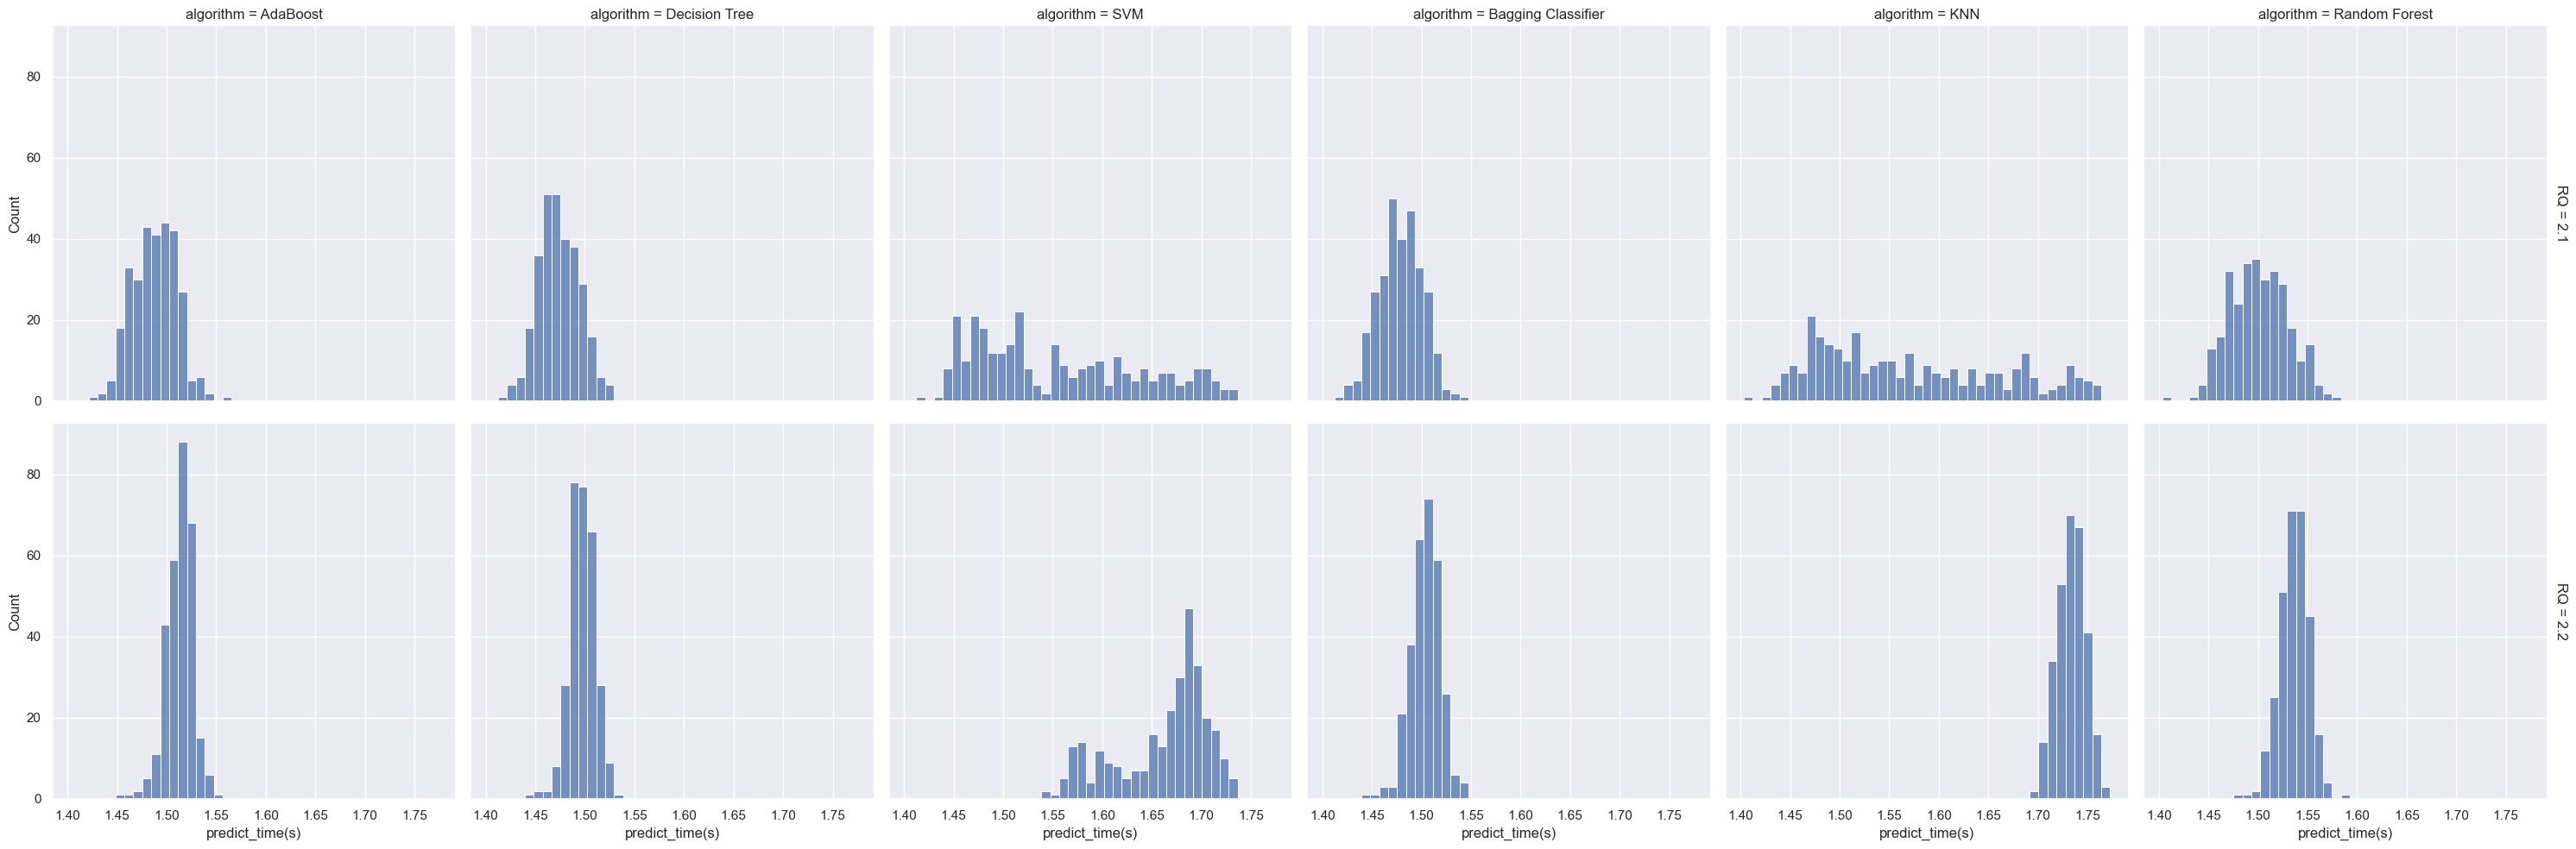

In [60]:
sns.set_theme(style="darkgrid")
sns.displot(
    origin, x="predict_time(s)", col="algorithm", row="RQ", facet_kws=dict(margin_titles=True),
)

### 第四题效果不好

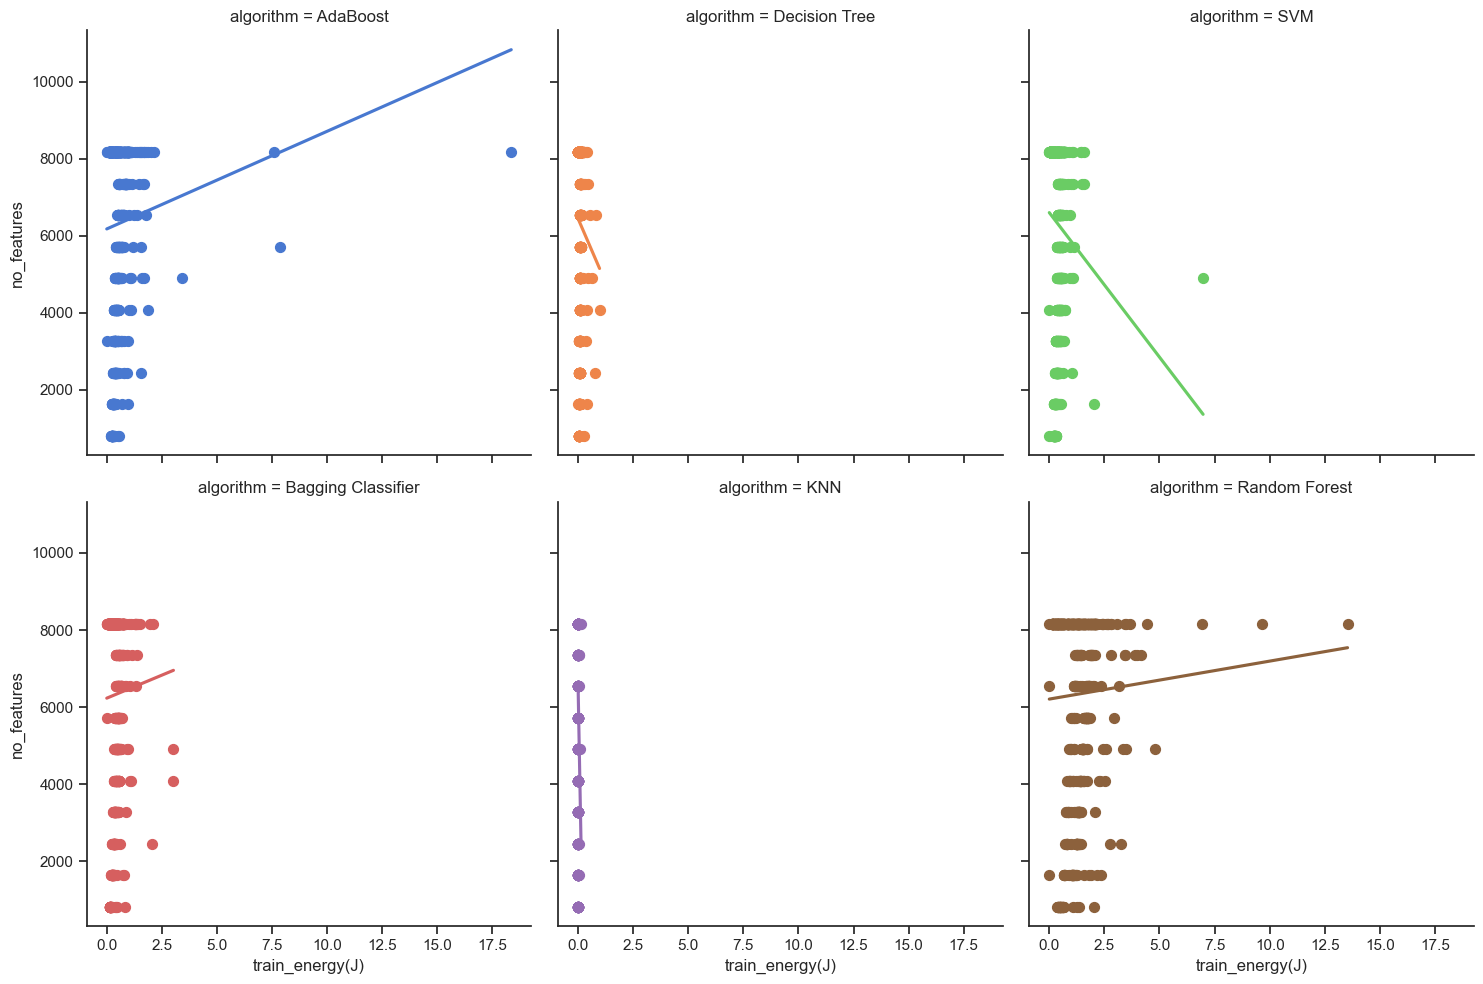

In [61]:
sns.set_theme(style="ticks")
sns.lmplot(
    data=origin, x="train_energy(J)", y="no_features", col="algorithm", hue="algorithm",
    palette="muted", ci=None, col_wrap=3, 
    scatter_kws={"s": 50, "alpha": 1}
)

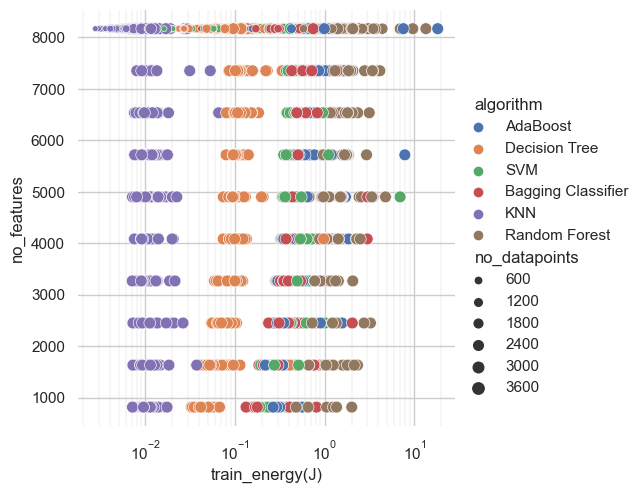

In [58]:
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=origin,
    x="train_energy(J)", y="no_features",
    hue="algorithm", size="no_datapoints",
)
g.set(xscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

<AxesSubplot:xlabel='train_energy(J)', ylabel='no_datapoints'>

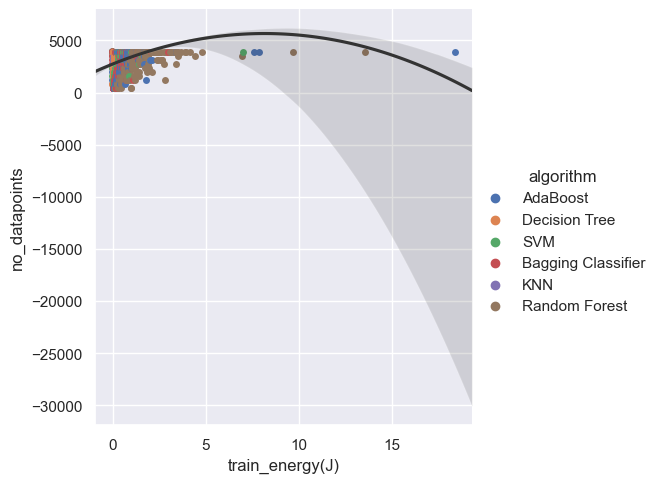

In [62]:
sns.set_theme()
sns.catplot(
    data=origin, x="train_energy(J)", y="no_datapoints", hue="algorithm",
    native_scale=True, zorder=1
)
sns.regplot(
    data=origin, x="train_energy(J)", y="no_datapoints",
    scatter=False, truncate=False, order=2, color=".2",
)


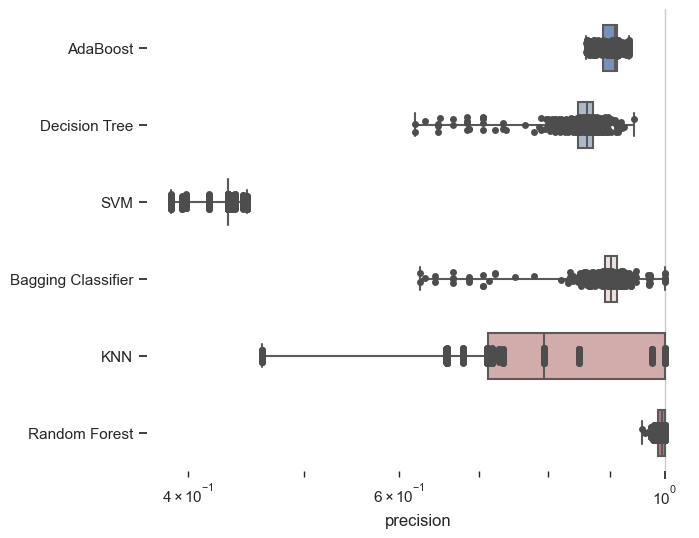

In [65]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")
sns.boxplot(x="precision", y="algorithm", data=origin,
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="precision", y="algorithm", data=origin,
              color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

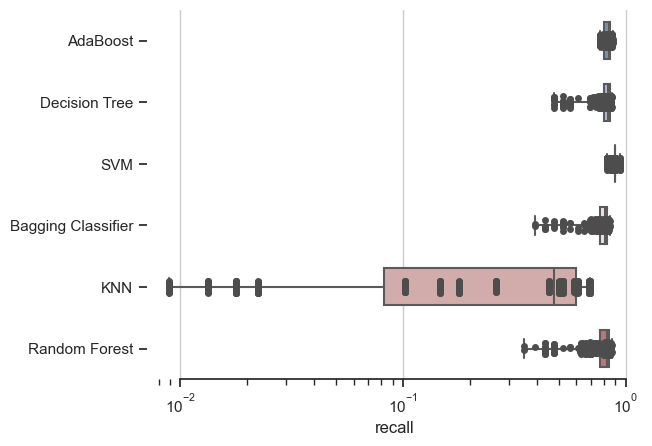

In [69]:
sns.set_theme(style="ticks")
f, ax = plt.subplots()
ax.set_xscale("log")
sns.boxplot(x="recall", y="algorithm", data=origin,
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="recall", y="algorithm", data=origin,
              color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

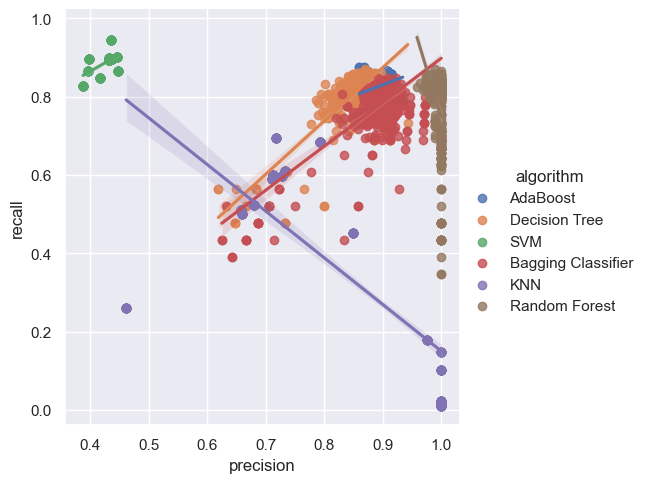

In [70]:
sns.set_theme()
g = sns.lmplot(
    data=origin,
    x="precision", y="recall", hue="algorithm",
    height=5
)
g.set_axis_labels("precision", "recall")